In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('_datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

_datasets\gender_submission.csv
_datasets\test.csv
_datasets\train.csv


# 1. Get the data

In [2]:
# LOAD TRAIN AND TEST DATA AND PRINT TRAIN HEAD
train_data = pd.read_csv('_datasets/train.csv')
test_data = pd.read_csv('_datasets/test.csv')
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# PRINT COLUMNS
train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

The attributes have the following meaning:

* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name, Sex, Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: where the passenger embarked the Titanic

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# DESCRIBE NUMERICAL COLUMNS
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Age, Cabin, Embarkment contain null values. 

Cabin attribute is missing most of its values and will be ignored.

PassengerId correspond to index and doesn't bring any value, hence will be ignored.

In [6]:
train_data.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)
test_data.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)

# 2. Explore the data

### 2.1 Survived as prediction target

In [7]:
# COUNT SURVIVED VALUES
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
# OVERALL SURVIVED RATE
train_data.Survived.value_counts()/len(train_data.Survived)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

38% of passengers specified in the dataset have survived. 342 of 891.

### 2.2 Pclass

In [9]:
# SURVIVAL RATE PER CLASS
pd.crosstab(train_data['Pclass'], train_data['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [10]:
# SURVIVAL RATE PER CLASS
pd.crosstab(train_data['Pclass'], train_data['Survived']).apply(lambda r:r/r.sum(), axis=1)

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


Survival rate drops with each lower class.
62% passengers from class 1 have survived, while only 24% from class 3.

### 2.3 Name

In [11]:
# Count how many unique values are in Name attribute
train_data.Name.nunique()

891

All names are unique and the column name in this form will be not of any use. 

Each name contains a title which will be explored further.

### Title based on Name
Found in another Kaggle notebook under this [link](https://www.kaggle.com/sinakhorami/titanic-best-working-classifier).

In [12]:
# FIND TITLE IN NAME ATTRIBUTE

import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

train_data['Title'] = train_data['Name'].apply(get_title)
print(pd.crosstab(train_data['Title'], train_data['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [13]:
# REPLACE RARE TITLE WITH OTHER CATEGORY
def clean_title(dataset):
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 
                                                 'Rev', 'Sir', 'Jonkheer', 'Dona'], 
                                                'other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

clean_title(train_data)

print (train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4   other  0.347826


### 2.4 Sex

In [14]:
# PASSENGER COUNT BY SEX
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
pd.crosstab(train_data['Sex'], train_data['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [16]:
# SURVIVAL RATE BY SEX

pd.crosstab(train_data['Sex'], train_data['Survived']).apply(lambda r:r/r.sum(), axis=1)

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


### 2.5 Age

Age attribute has about 19% missing values, which will be replaced with median.

In [17]:
# PASSENGERS WITH MISSING AGE VALUES
train_data[train_data.isnull().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S,Mr
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C,Mrs
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C,Mr
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C,Mr
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S,Miss
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S,Mr
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S,Mr


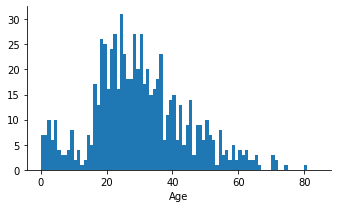

In [18]:
g = sns.FacetGrid(train_data, height=3, aspect=1.6)
bins = np.arange(0, 85, 1)
g.map(plt.hist, 'Age', bins=bins)

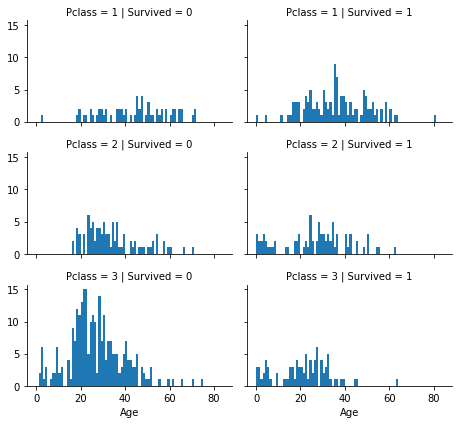

In [19]:
# AGE HISTOGRAM PER PCLASS AND SURVIVED
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=2, aspect=1.6)
bins = np.arange(0, 85, 1)
grid.map(plt.hist, 'Age', bins=bins)
grid.add_legend()

In [20]:
train_data['Age'].median()

28.0

In [21]:
train_data[['Age', 'Pclass']].groupby(['Pclass']).median()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


Should filled age data vary between each Pclass?

#### 2.5.1 FILLNA WITH AGE MEDIAN

In [22]:
# FILL MISSING AGE DATA WITH MEDIAN VALUE
train_data_agefill = train_data.copy()
train_data_agefill['Age'] = train_data_agefill['Age'].fillna((train_data_agefill['Age'].median()))
# PRINT SAMPLE VALUES
train_data_agefill.loc[[5, 17, 19]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,Mr
17,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,S,Mr
19,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,C,Mrs


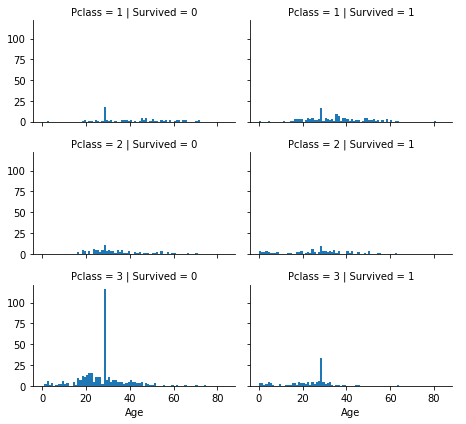

In [23]:
# AGE HISTOGRAM PER PCLASS AND SURVIVED
grid = sns.FacetGrid(train_data_agefill, col='Survived', row='Pclass', height=2, aspect=1.6)
bins = np.arange(0, 85, 1)
grid.map(plt.hist, 'Age', bins=bins)
grid.add_legend()

In [24]:
train_data_agefill['Age'].value_counts()

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
55.50      1
70.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

#### 2.5.2 CATEGORISE AGE DATA INTO RANGE GROUPS

In [25]:
# ASSIGN AGE ATTRIBUTE INTO RANGE CATEGORIES AND DROP AGE
def get_age_cat(dataset_):
    dataset = dataset_.copy()
    bins = np.arange(0, 100, 10)
#     labels = ['(00-10]', '(10-20]', '(20-30]', '(30-40]', '(40-50]', '(50-60]', '(60-70]', '(70-80]', '(80-90]']
#     dataset['Age_group'] = pd.cut(dataset['Age'], bins=bins, labels=labels)
#     dataset.drop(['Age'], axis=1, inplace=True)
    bins = [-1, 10, 20, 30, 50, 200]
    labels = ['<=10','(10-20]' , '(20-30]', '(30-50]', '>50']
    dataset['Age_group'] = pd.cut(dataset['Age'], bins=bins, labels=labels)
    return dataset
    
train_data_agefill = get_age_cat(train_data_agefill)
# train_data_agefill

In [26]:
pd.crosstab(train_data_agefill['Age_group'], train_data['Survived'])

Survived,0,1
Age_group,,
<=10,26,38
(10-20],71,44
(20-30],271,136
(30-50],139,102
>50,42,22


### 2.6 SibSp and Parch
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.

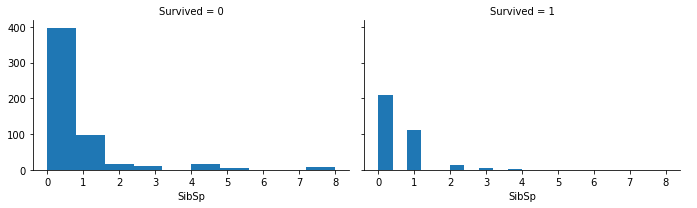

In [27]:
grid = sns.FacetGrid(train_data_agefill, col="Survived", height=3, aspect=1.6)
grid.map(plt.hist, "SibSp")
grid.add_legend()

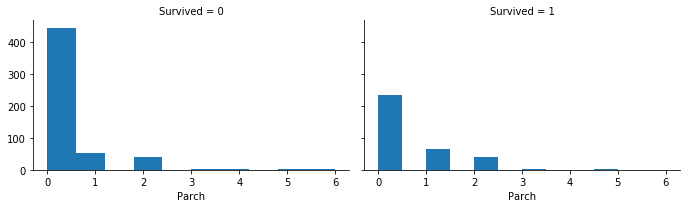

In [28]:
grid = sns.FacetGrid(train_data_agefill, col="Survived", height=3, aspect=1.6)
grid.map(plt.hist, "Parch")
grid.add_legend()

### Specify if passenger is traveling alone or with family based on SibSp and Parch

In [29]:
def get_is_alone_cat(dataset):
    bins = [-1, 0, 20] # two bins with 0 and non-0
    labels=[1, 0] # 1 if alone
    dataset['is_alone'] = pd.cut((dataset['SibSp']+dataset['Parch']), bins=bins, labels=labels)
#     dataset.drop(['SibSp', 'Parch'], axis=1, inplace=True)

get_is_alone_cat(train_data_agefill)
train_data_agefill[['Survived', 'is_alone']].groupby(['Survived', 'is_alone']).size()

Survived  is_alone
0         1           374
          0           175
1         1           163
          0           179
dtype: int64

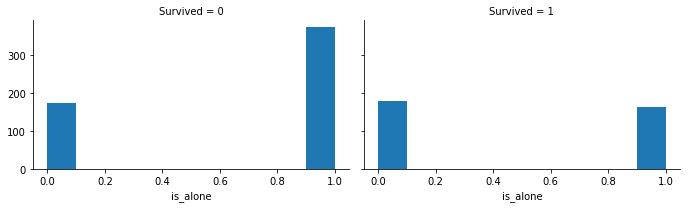

In [30]:
grid = sns.FacetGrid(train_data_agefill, col="Survived", height=3, aspect=1.6)
grid.map(plt.hist, "is_alone")
grid.add_legend()

### 2.7 Ticket

In [31]:
train_data_agefill.Ticket.nunique()

681

In [32]:
train_data_agefill.Ticket.value_counts()

CA. 2343             7
1601                 7
347082               7
3101295              6
347088               6
                    ..
349219               1
STON/O 2. 3101286    1
PC 17603             1
113807               1
3101276              1
Name: Ticket, Length: 681, dtype: int64

Ticket attribute doesn't provide useful information and will be dropped.

### 2.8 Fare

Fare    AxesSubplot(0.125,0.657941;0.227941x0.222059)
dtype: object

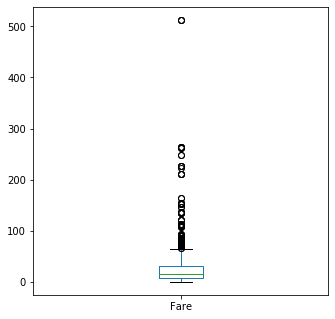

In [33]:
train_data_agefill[['Fare']].plot.box(subplots=True, layout=(3, 3), figsize=(18,18))

In [34]:
Q1, Q3 = train_data_agefill.Fare.quantile([0.25, 0.75])
Q1, Q3

(7.9104, 31.0)

In [35]:
IQR = Q3 - Q1
IQR

23.0896

In [36]:
upper_whisker = Q3 + 1.5 * IQR
upper_outliers = train_data_agefill[train_data_agefill['Fare'] > upper_whisker]
len(upper_outliers)/len(train_data_agefill)

0.13019079685746351

In [37]:
lower_whisker = Q1 - 1.5 * IQR
lower_outliers = train_data_agefill[train_data_agefill['Fare'] < lower_whisker]
len(lower_outliers)/len(train_data)

0.0

In [38]:
Q2 = train_data_agefill.Fare.quantile(0.5)
data_max = train_data_agefill.Fare.max()
data_min = train_data_agefill.Fare.min()

test = [lower_whisker, Q1, Q2, Q3, upper_whisker, data_max]

# test3 = pd.cut(train_data_agefill.Fare, bins=test, labels = ['1', '2', '3', '4', '5'])
# test3

# test3.value_counts() / len(test3)
test

[-26.724, 7.9104, 14.4542, 31.0, 65.6344, 512.3292]

Fare will be devided into 5 range categories

In [39]:
fare_test = pd.DataFrame()
bins = [-1, 8, 15, 31, 66, 10000]
labels = ['<=8','(8-15]' , '(15-31]', '(31-66]', '>60']
fare_test['FareGroup'] = pd.cut(train_data_agefill['Fare'], bins=bins, labels=labels)

In [40]:
pd.crosstab(fare_test['FareGroup'], train_data['Survived'])

Survived,0,1
FareGroup,,
<=8,189,52
(8-15],155,62
(15-31],112,99
(31-66],56,50
>60,37,79


In [41]:
fare_test.FareGroup.value_counts().sum()

891

#### 2.8.2 CATEGORISE FARE INTO RANGE GROUPS

In [42]:
# ASSIGN AGE ATTRIBUTE INTO RANGE CATEGORIES AND DROP AGE
def get_fare_cat(dataset_):
    dataset = dataset_.copy()
    Q1, Q2, Q3 = dataset.Fare.quantile([0.25, 0.5, 0.75])
    LW, UW = Q1 - 1.5 * (Q3 - Q1), Q3 + 1.5 * (Q3 - Q1)
    df_max = dataset.Fare.max()
    bins = [LW, Q1, Q2, Q3, UW, df_max]

    labels = ['1', '2', '3', '4', '5']
    dataset['Fare_group'] = pd.cut(dataset['Fare'], bins=bins, labels=labels)
    return dataset
    
train_data_agefill = get_fare_cat(train_data_agefill)
train_data_agefill

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_group,is_alone,Fare_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,(20-30],0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,(30-50],0,5
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,(20-30],1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,(30-50],0,4
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,(30-50],1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,other,(20-30],1,2
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,(10-20],1,3
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,Miss,(20-30],0,3
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,(20-30],1,3


In [43]:
pd.crosstab(train_data_agefill['Fare_group'], train_data['Survived'])

Survived,0,1
Fare_group,,
1,179,44
2,156,68
3,121,101
4,56,50
5,37,79


### 2.9 Embarked

In [44]:
# COUND MISSING DATA IN EMBARKED
train_data_agefill.Embarked.isnull().sum()

2

In [45]:
train_data_agefill.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Embarked missing data will be filled with most frequent attribute

In [46]:
train_data_agefare_fill = train_data_agefill.copy()
train_data_agefare_fill['Embarked'].fillna(train_data_agefill['Embarked'].value_counts()[0])

train_data_agefare_fill

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_group,is_alone,Fare_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,(20-30],0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,(30-50],0,5
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,(20-30],1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,(30-50],0,4
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,(30-50],1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,other,(20-30],1,2
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,(10-20],1,3
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,Miss,(20-30],0,3
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,(20-30],1,3


### 2.10 Select data

In [47]:
data = train_data_agefare_fill[['Survived', 'Pclass', 'Sex', 'Embarked', 'Title', 'Age_group', 'is_alone', 'Fare_group']]
data

,Survived,Pclass,Sex,Embarked,Title,Age_group,is_alone,Fare_group
0,0,3,male,S,Mr,(20-30],0,1
1,1,1,female,C,Mrs,(30-50],0,5
2,1,3,female,S,Miss,(20-30],1,2
3,1,1,female,S,Mrs,(30-50],0,4
4,0,3,male,S,Mr,(30-50],1,2
...,...,...,...,...,...,...,...,...
886,0,2,male,S,other,(20-30],1,2
887,1,1,female,S,Miss,(10-20],1,3
888,0,3,female,S,Miss,(20-30],0,3
889,1,1,male,C,Mr,(20-30],1,3


# 3. Prepare the data
### 3.1 Split data into train and test set

In [48]:
from sklearn.model_selection import train_test_split

train_data = pd.read_csv('_datasets/train.csv')
test_data = pd.read_csv('_datasets/test.csv')

X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111, stratify=y)

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

### 3.2 Construct classes for pipeline

In [50]:
# def get_age_cat(dataset):
#     bins = [-1, 10, 20, 30, 50, 200]
#     labels = ['<=10','(10-20]' , '(20-30]', '(30-50]', '>50']
#     dataset['Age_group'] = pd.cut(dataset['Age'], bins=bins, labels=labels)
#     dataset.drop(['Age'], axis=1, inplace=True)

class AgeCategory(BaseEstimator, TransformerMixin):
    """
    Creates new attribute based on Age data
    Converts input into DataFrame with provided column names
    """
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        bins = [-1, 10, 20, 30, 50, 200]
        labels = ['<=10','(10-20]' , '(20-30]', '(30-50]', '>50']
        X['AgeGroup'] = pd.cut(X['Age'], bins=bins, labels=labels)
#         X[6] = pd.cut(X[1], bins=bins, labels=labels)
        # X.drop(['Age'], axis=1, inplace=True)
        return X

In [51]:
# def get_fare_cat(dataset_):
#     dataset = dataset_.copy()
#     Q1, Q2, Q3 = dataset.Fare.quantile([0.25, 0.5, 0.75])
#     LW, UW = Q1 - 1.5 * (Q3 - Q1), Q3 + 1.5 * (Q3 - Q1)
#     df_max = dataset.Fare.max()
#     bins = [LW, Q1, Q2, Q3, UW, df_max]

#     labels = ['1', '2', '3', '4', '5']
#     dataset['Fare_group'] = pd.cut(dataset['Fare'], bins=bins, labels=labels)
#     return dataset

class FareCategory(BaseEstimator, TransformerMixin):
    """ Split Fare attribute into groups """
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        bins = [-1, 8, 15, 31, 66, 10000]
        labels = ['<=8','(8-15]' , '(15-31]', '(31-66]', '>60']
        X['FareGroup'] = pd.cut(X['Fare'], bins=bins, labels=labels)
        return X

In [52]:
# def get_is_alone_cat(dataset):
#     bins = [-1, 0, 20] # two bins with 0 and non-0
#     labels=[1, 0] # 1 if alone
#     dataset['is_alone'] = pd.cut((dataset['SibSp']+dataset['Parch']), bins=bins, labels=labels)
#     dataset.drop(['SinSp', 'Parch'])

# Is alone based on SibSp and Parch values

class IsAloneCategory(BaseEstimator, TransformerMixin):
    """
    Creates new attribute based on SibSp and Parch. 
    """
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        bins = [-1, 0, 20] # two bins with 0 and non-0
        labels=[1, 0] # 1 if alone
        X['IsAlone'] = pd.cut((X['SibSp']+X['Parch']), bins=bins, labels=labels)
        return X

In [53]:
# def get_title(name):
#     title_search = re.search(' ([A-Za-z]+)\.', name)
#     # If the title exists, extract and return it.
#     if title_search:
#         return title_search.group(1)
#     return ""

# train_data['Title'] = train_data['Name'].apply(get_title)
# print(pd.crosstab(train_data['Title'], train_data['Sex']))

class NamesTitle(BaseEstimator, TransformerMixin):
    """
    Creates new attrubute based on Name string content
    Defines internal methods: get_title and clean_titles
    """
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # pull title from Name column
        X['Titles'] = X['Name'].apply(self.get_title)
        # set unique titles (count<10) as 'other'
        X['Titles'] = self.clean_titles(X['Titles'])
        return X
    def get_title(self, name):
        """" Pull title. from Name """
        title_search = re.search(' ([A-Za-z]+)\.', name)
        # If the title exists, extract and return it.
        if title_search:
            return title_search.group(1)
        return ""
    def clean_titles(self, titles):
        """ Count title occurrence and set n<10 as 'other'. """
        titles_count = titles.value_counts()
        unique_titles = titles_count[titles_count < 20].index.tolist()
        titles = titles.replace(unique_titles, 'other')
        return titles

In [54]:
class PipelineSummary(BaseEstimator, TransformerMixin):
    """ Use to transform data from array to DataFrame """
    def __init__(self, col_name=None):
        self.col_name = col_name 
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = pd.DataFrame(X, columns=self.col_name)
        return X

### 3.3 Construct data preprocessing pipeline
This [medium](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf) worked well as a guide to constructing the following pipelines.

And this [one](https://towardsdatascience.com/using-columntransformer-to-combine-data-processing-steps-af383f7d5260) to understand ColumnTransformer better.

In [55]:
# numeric_features = X.select_dtypes(include=['int64', 'float64']).drop(['PassengerId'], axis=1).columns.tolist()
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Name']

In [56]:
imputer_transformer = ColumnTransformer(
    transformers=[
        ('num_imputer', SimpleImputer(strategy='median'), numeric_features),
        ('cat_imputer', SimpleImputer(strategy='most_frequent'), categorical_features)
    ]
)

In [57]:
col_transformer = ColumnTransformer(
    transformers=[
        ('std_scaler', StandardScaler(), ['Age', 'Fare']),
        ('one_hot', OneHotEncoder(handle_unknown='ignore'), ['Pclass', 'AgeGroup', 'IsAlone', 'Embarked', 
                                                             'Titles', 'FareGroup'])
    ],
    remainder='drop',
)

In [58]:
# combine numeric and categorical features
features = numeric_features.copy()
features.extend(categorical_features)

# test pipeline
preprocess_pipeline = Pipeline(steps=[
    ('imputer', imputer_transformer),
    ('imp_output_to_df', PipelineSummary(features)),
#     ('print2', PrintPip()),
    ('add_age_category', AgeCategory()),
    ('add_isAlone_category', IsAloneCategory()),
#     ('print1', PrintPip3()),
    ('add_fare_category', FareCategory()),
    ('get_titles', NamesTitle()),
#     ('print2', PrintPip3()),
#     ('printcol', PrintCol()),
    ('std_scaler_and_onehot', col_transformer),
# #     ('print', PrintPip2())
#     ('summary', PipelineSummary(col_name=None))
])

In [59]:
preprocessor = preprocess_pipeline.fit_transform(X)
preprocessor

array([[-0.56573646, -0.50244517,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.66386103,  0.78684529,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.48885426,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.1046374 , -0.17626324,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.04438104,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.49237783,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [60]:
print(preprocess_pipeline)

Pipeline(memory=None,
         steps=[('imputer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num_imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat_imputer',
               

In [61]:
# [Age, 
# Fare, 
# Pclass x3
# AgeGroup x 5
# IsAlone x2
# Embarked x3
# Titles x 5
# FareGroup x5]


pd.DataFrame(preprocessor)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.565736,-0.502445,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.663861,0.786845,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.258337,-0.488854,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.433312,0.420730,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.433312,-0.486337,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.181487,-0.386671,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
887,-0.796286,-0.044381,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
888,-0.104637,-0.176263,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
889,-0.258337,-0.044381,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# 4. Model
### 4.1 Model selection
The following code is based on example from [medium](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf)

In [62]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocess_pipeline),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))
    print('* * * * *\n')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
model score: 0.749
* * * * *

SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
model score: 0.615
* * * * *

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=True, random_state=None, shrinking=True,
      tol=0.001, verbose=False)
model score: 0.777
* * * * *

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impuri

### 4.2 Parameter selection

In [63]:
rf = Pipeline(steps=[('preprocessor', preprocess_pipeline), ('classifier', RandomForestClassifier())])

param_grid = { 
    'classifier__n_estimators': [100, 200, 500, 1000],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [4,5,6,7,8],
    'classifier__criterion' :['gini', 'entropy'],
    'classifier__random_state': [111]
}
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(rf, param_grid, n_jobs= 1)
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

{'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__max_features': 'auto', 'classifier__n_estimators': 200, 'classifier__random_state': 111}
0.8244656751699004


In [64]:
param = {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}
rf = Pipeline(steps=[('preprocessor', preprocess_pipeline), 
                     ('classifier', RandomForestClassifier(criterion='entropy', 
                                                           max_depth=5, 
                                                           max_features= 'auto', 
                                                           n_estimators=500))])

rf.fit(X_train, y_train)
print("model score: %.3f" % rf.score(X_test, y_test))

model score: 0.788


In [65]:
# Access OneHotEncoder in pipelines
# Trying to find out output column names
# https://stackoverflow.com/questions/54646709/sklearn-pipeline-get-feature-name-after-onehotencode-in-columntransformer/54648023

rf.named_steps['preprocessor'].named_steps['std_scaler_and_onehot'].transformers_[1]

('one_hot',
 OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
               handle_unknown='ignore', sparse=True),
 ['Pclass', 'AgeGroup', 'IsAlone', 'Embarked', 'Titles', 'FareGroup'])

In [66]:
rf.named_steps['classifier'].feature_importances_

array([0.07105689, 0.12936491, 0.05121728, 0.0184321 , 0.07517876,
       0.00570564, 0.00874005, 0.00835309, 0.01177451, 0.00616382,
       0.01448797, 0.01715105, 0.01252742, 0.01018902, 0.01405159,
       0.00472432, 0.10318191, 0.27786554, 0.09618476, 0.00928529,
       0.00744528, 0.00789611, 0.00707227, 0.01258187, 0.01936855])

#### Cross-validated metrics

In [67]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5)
scores

array([0.81005587, 0.82022472, 0.83707865, 0.79775281, 0.80337079])

### 4.3 Performance measure: confusion matrix, precision score, recall score, f1 score

In [68]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_test_pred = cross_val_predict(
    rf, X_test, y_test, cv=3
)
confusion_matrix(y_test, y_test_pred)

array([[98, 12],
       [25, 44]], dtype=int64)

In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score
ps = precision_score(y_test, y_test_pred)
rs = recall_score(y_test, y_test_pred)
f1s = f1_score(y_test, y_test_pred)
ps, rs, f1s

(0.7857142857142857, 0.6376811594202898, 0.7039999999999998)

### 4.4 Performance measure: ROC curve

In [70]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

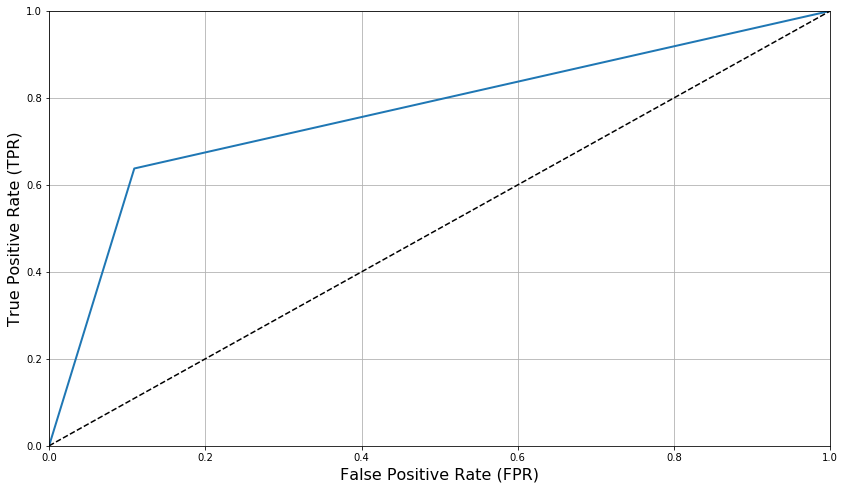

In [71]:
plt.figure(figsize=(14, 8))
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
    plt.grid(True)
plot_roc_curve(fpr, tpr)
plt.show()

# Submit results

In [72]:
# predictions = rf.predict(test_data)

# output = pd.DataFrame({'PassengerID': test_data.PassengerId, 
#                        'Survived': predictions})
# output.to_csv('my_submission.csv', index=False)
# print('Your submission was successfully saved')